In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data=pd.read_csv("/home/ebru/18110131003/data.csv")
data

,metrekare,oda,binayasi,bulundugukat,site,kira,isi,balkon,banyo,tip,esya,lokasyon,see
0,295,2,14,1,0,2650,5,1,1,3,0,6,20
1,125,2,11,5,0,950,1,2,1,0,0,0,65
2,255,4,24,7,1,2350,3,1,2,0,0,3,45
3,155,3,1,13,1,1150,2,2,1,0,0,1,30
4,290,5,15,15,1,2550,3,3,2,0,0,6,25
5,220,2,4,16,1,1850,3,1,2,0,1,3,25
6,250,2,1,14,0,2250,3,1,2,0,0,4,10
7,150,1,2,1,1,1050,3,0,1,0,0,5,60
8,280,3,15,3,0,2450,3,2,2,2,1,6,10
9,215,5,4,1,1,1750,4,3,1,1,0,3,25


In [4]:
data.describe()

,metrekare,oda,binayasi,bulundugukat,site,kira,isi,balkon,banyo,tip,esya,lokasyon,see
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,197.857143,3.428571,11.323810,7.000000,0.523810,1902.857143,3.038095,2.076190,1.371429,0.361905,0.228571,3.342857,28.152381
std,63.763600,1.343482,7.445307,5.550468,0.501828,706.012250,0.634335,0.957714,0.523618,0.810078,0.421927,1.920680,18.018036
min,80.000000,1.000000,1.000000,1.000000,0.000000,850.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,150.000000,2.000000,4.000000,2.000000,0.000000,1350.000000,3.000000,2.000000,1.000000,0.000000,0.000000,2.000000,20.000000
50%,200.000000,4.000000,11.000000,5.000000,1.000000,1800.000000,3.000000,2.000000,1.000000,0.000000,0.000000,3.000000,22.000000
75%,240.000000,4.000000,16.000000,12.000000,1.000000,2400.000000,3.000000,3.000000,2.000000,0.000000,0.000000,5.000000,30.000000
max,400.000000,6.000000,30.000000,19.000000,1.000000,4100.000000,5.000000,5.000000,3.000000,3.000000,1.000000,6.000000,100.000000


In [5]:
data.isnull()

,metrekare,oda,binayasi,bulundugukat,site,kira,isi,balkon,banyo,tip,esya,lokasyon,see
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
75     False
76     False
77     False
78     False
79     False
80     False
81     False
82     False
83     False
84     False
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
102    False
103    False
104    False
Length: 105, dtype: bool

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(105, 13)

In [9]:
#regresyon

In [10]:
#bağımsız değişken
x=data[['metrekare','oda','binayasi','bulundugukat', 'site','kira','isi','balkon','banyo','tip','esya','lokasyon']]
#bağımlı değişken
y=data['see']

In [11]:
#dağılım grafikleri

<function matplotlib.pyplot.show(*args, **kw)>

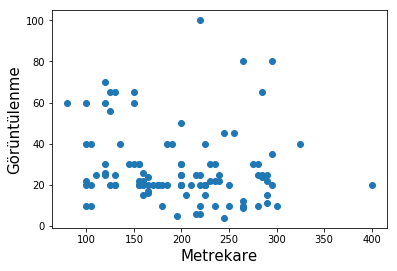

In [12]:
plt.scatter(x['metrekare'],y)
plt.xlabel('Metrekare', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

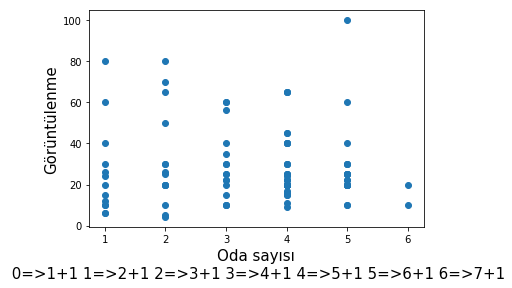

In [13]:
plt.scatter(x['oda'],y)
plt.xlabel('Oda sayısı\n 0=>1+1 1=>2+1 2=>3+1 3=>4+1 4=>5+1 5=>6+1 6=>7+1', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

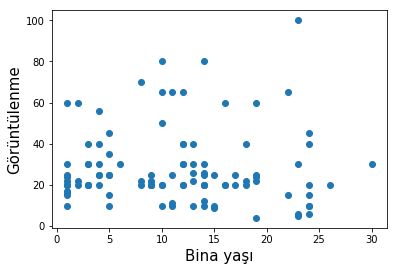

In [14]:
plt.scatter(x['binayasi'],y)
plt.xlabel('Bina yaşı', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

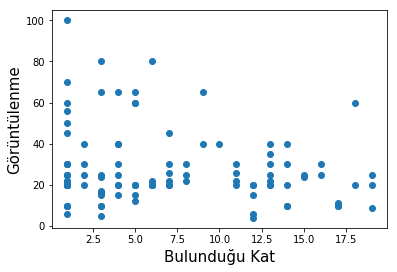

In [15]:
plt.scatter(x['bulundugukat'],y)
plt.xlabel('Bulunduğu Kat', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

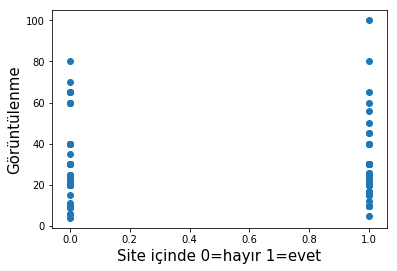

In [16]:
plt.scatter(x['site'],y)
plt.xlabel('Site içinde 0=hayır 1=evet', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

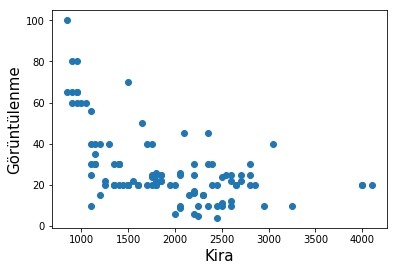

In [17]:
plt.scatter(x['kira'],y)
plt.xlabel('Kira', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

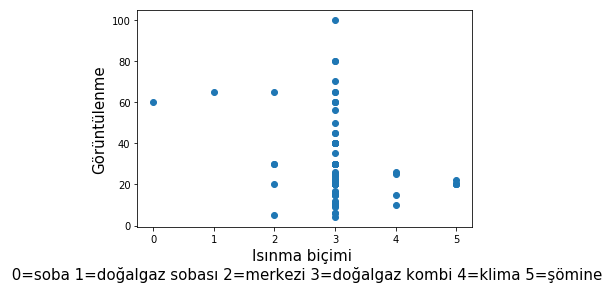

In [18]:
plt.scatter(x['isi'],y)
plt.xlabel('Isınma biçimi \n 0=soba 1=doğalgaz sobası 2=merkezi 3=doğalgaz kombi 4=klima 5=şömine', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

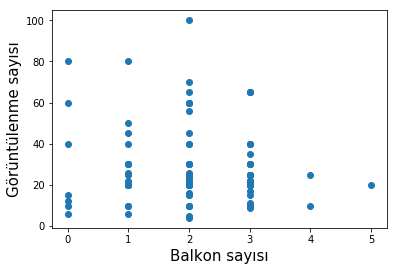

In [19]:
plt.scatter(x['balkon'],y)
plt.xlabel('Balkon sayısı', fontsize=15)
plt.ylabel('Görüntülenme sayısı', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

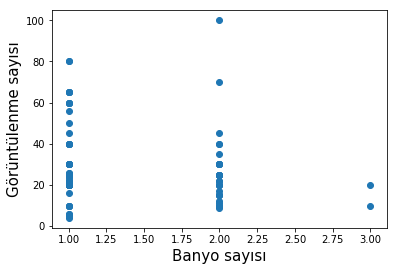

In [20]:
plt.scatter(x['banyo'],y)
plt.xlabel('Banyo sayısı', fontsize=15)
plt.ylabel('Görüntülenme sayısı', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

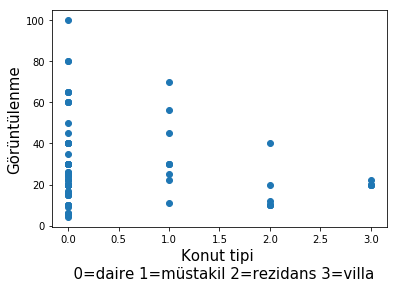

In [21]:
plt.scatter(x['tip'],y)
plt.xlabel('Konut tipi \n  0=daire 1=müstakil 2=rezidans 3=villa', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

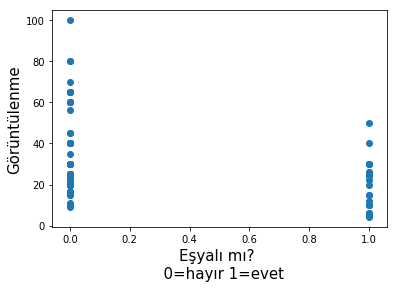

In [22]:
plt.scatter(x['esya'],y)
plt.xlabel('Eşyalı mı? \n  0=hayır 1=evet', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

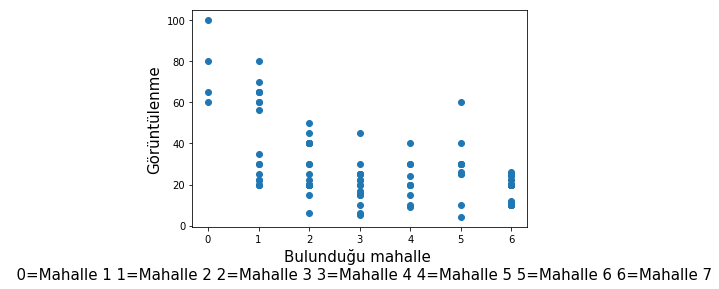

In [23]:
plt.scatter(x['lokasyon'],y)
plt.xlabel('Bulunduğu mahalle \n  0=Mahalle 1 1=Mahalle 2 2=Mahalle 3 3=Mahalle 4 4=Mahalle 5 5=Mahalle 6 6=Mahalle 7', fontsize=15)
plt.ylabel('Görüntülenme', fontsize=15)
plt.show

In [24]:
plt.rcParams['figure.figsize'] = [15, 10]

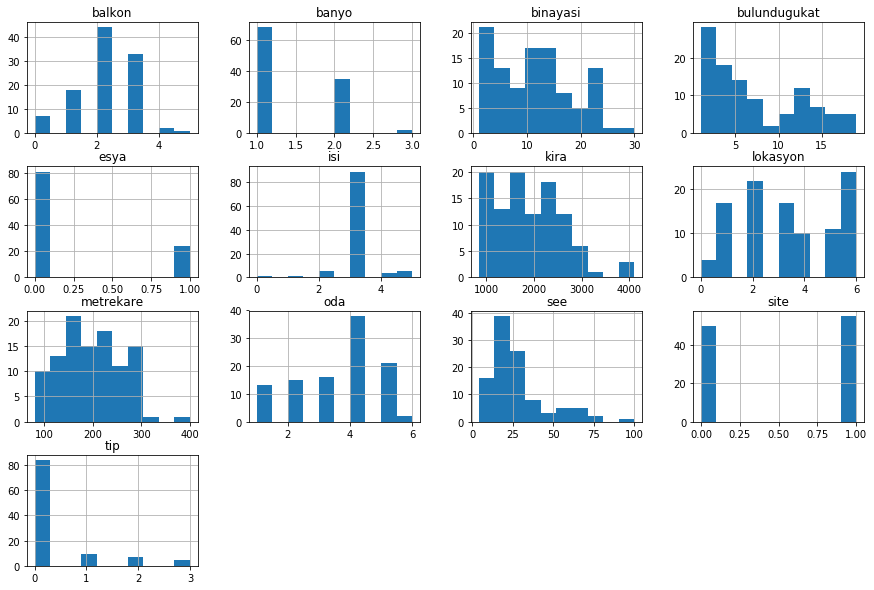

In [25]:
data.hist()
plt.show()

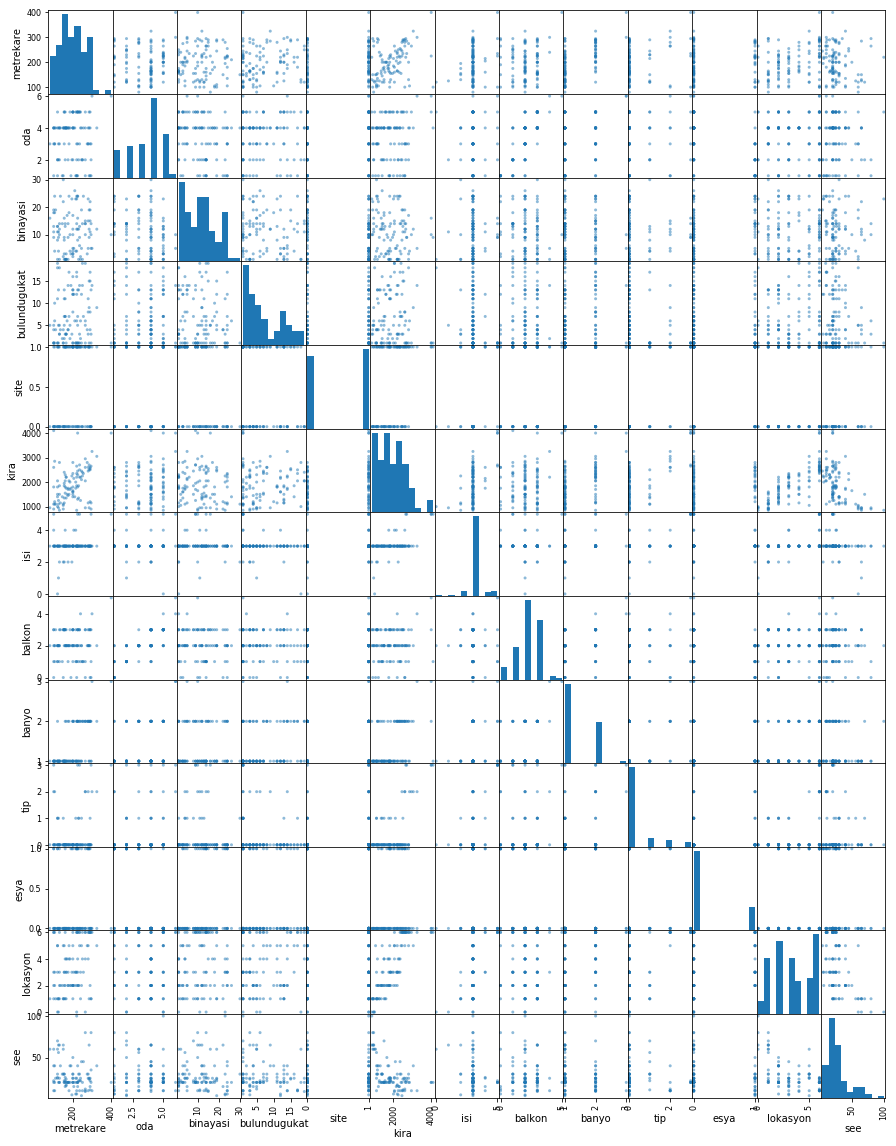

In [26]:
plt.rcParams['figure.figsize'] = [15, 20]
scatter_matrix(data)
plt.show()

In [27]:
plt.rcParams['figure.figsize'] = [15,10]

In [28]:
#train-test split
array = data.values
x = array[:,0:12]
y = array[:,12:13] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [32]:
x_train.shape

(84, 12)

In [33]:
y_train.shape

(84, 1)

In [34]:
x_test.shape

(21, 12)

In [35]:
y_test.shape

(21, 1)

In [36]:
#regression

In [37]:
x_train

array([[220,   3,  12, ...,   0,   0,   6],
       [155,   3,   1, ...,   0,   0,   1],
       [160,   2,  14, ...,   0,   1,   6],
       ...,
       [195,   2,  23, ...,   0,   1,   3],
       [230,   5,   1, ...,   1,   0,   2],
       [165,   4,   1, ...,   0,   0,   3]])

In [38]:
reg=LinearRegression()

In [39]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
reg.intercept_

array([69.03952341])

In [41]:
reg.coef_

array([[ 8.52300605e-03, -8.82009449e-01,  1.06269416e-01,
        -5.71115176e-01,  4.25482459e+00, -1.22011331e-02,
        -3.38434099e+00, -1.08676660e+00,  4.99859988e+00,
         3.99502776e+00, -8.96822646e+00, -2.49557031e+00]])

In [42]:
reg.score(x_train,y_train)

0.4777443433384042

In [43]:
#düzeltilmiş r2
#r2=reg.score(x,y)
#n=x.shape[0]
#p=x.shape[1]
#duzeltilmis_r2=1-(1-r2)*(n-1)/(n-p-1)
#duzeltilmis_r2*/
y_test

array([[25],
       [10],
       [45],
       [10],
       [20],
       [20],
       [17],
       [20],
       [20],
       [20],
       [20],
       [20],
       [22],
       [40],
       [60],
       [25],
       [30],
       [20],
       [20],
       [10],
       [25]])

In [62]:
tahmin=reg.predict(x_test)
print(tahmin)

[[20.92092217]
 [41.03184783]
 [33.09037289]
 [16.66438646]
 [31.90140059]
 [29.3673973 ]
 [31.82020325]
 [12.75046328]
 [14.54410829]
 [30.6728571 ]
 [26.07109307]
 [23.81403749]
 [33.55480376]
 [39.49093009]
 [42.88874868]
 [12.03389079]
 [52.45473292]
 [37.23694734]
 [39.2886704 ]
 [20.48690707]
 [28.3278486 ]]


In [ ]:
### Grafik

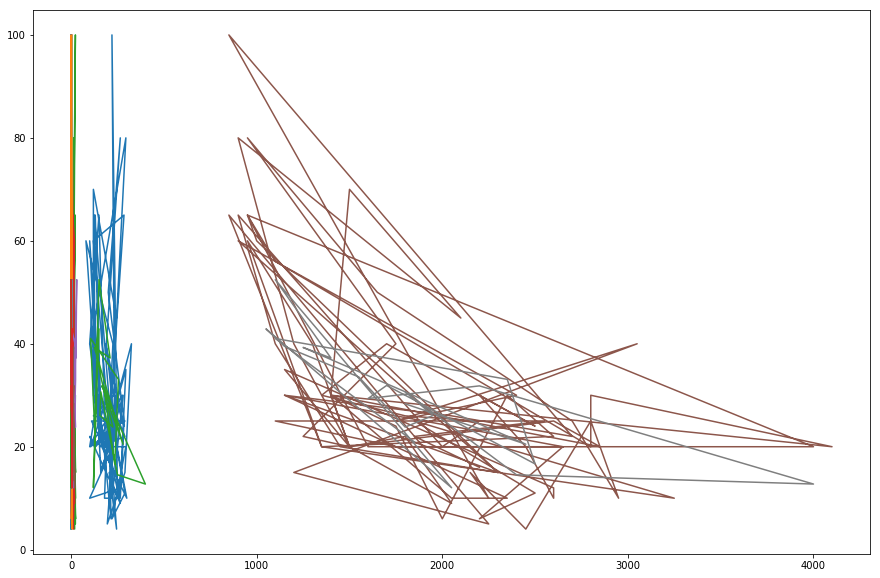

In [140]:
plt.plot(x_train,y_train)
plt.plot(x_test,tahmin)

In [65]:
#r2 değeri
print("Lineer R2 değeri:")
print(r2_score(y_test,tahmin))

Lineer R2 değeri:
-0.33235312577214615


ValueError: Expected 2D array, got 1D array instead:
array=[-1.00000000e+02 -9.97937938e+01 -9.95875876e+01 -9.93813814e+01
 -9.91751752e+01 -9.89689690e+01 -9.87627628e+01 -9.85565566e+01
 -9.83503504e+01 -9.81441441e+01 -9.79379379e+01 -9.77317317e+01
 -9.75255255e+01 -9.73193193e+01 -9.71131131e+01 -9.69069069e+01
 -9.67007007e+01 -9.64944945e+01 -9.62882883e+01 -9.60820821e+01
 -9.58758759e+01 -9.56696697e+01 -9.54634635e+01 -9.52572573e+01
 -9.50510511e+01 -9.48448448e+01 -9.46386386e+01 -9.44324324e+01
 -9.42262262e+01 -9.40200200e+01 -9.38138138e+01 -9.36076076e+01
 -9.34014014e+01 -9.31951952e+01 -9.29889890e+01 -9.27827828e+01
 -9.25765766e+01 -9.23703704e+01 -9.21641642e+01 -9.19579580e+01
 -9.17517518e+01 -9.15455455e+01 -9.13393393e+01 -9.11331331e+01
 -9.09269269e+01 -9.07207207e+01 -9.05145145e+01 -9.03083083e+01
 -9.01021021e+01 -8.98958959e+01 -8.96896897e+01 -8.94834835e+01
 -8.92772773e+01 -8.90710711e+01 -8.88648649e+01 -8.86586587e+01
 -8.84524525e+01 -8.82462462e+01 -8.80400400e+01 -8.78338338e+01
 -8.76276276e+01 -8.74214214e+01 -8.72152152e+01 -8.70090090e+01
 -8.68028028e+01 -8.65965966e+01 -8.63903904e+01 -8.61841842e+01
 -8.59779780e+01 -8.57717718e+01 -8.55655656e+01 -8.53593594e+01
 -8.51531532e+01 -8.49469469e+01 -8.47407407e+01 -8.45345345e+01
 -8.43283283e+01 -8.41221221e+01 -8.39159159e+01 -8.37097097e+01
 -8.35035035e+01 -8.32972973e+01 -8.30910911e+01 -8.28848849e+01
 -8.26786787e+01 -8.24724725e+01 -8.22662663e+01 -8.20600601e+01
 -8.18538539e+01 -8.16476476e+01 -8.14414414e+01 -8.12352352e+01
 -8.10290290e+01 -8.08228228e+01 -8.06166166e+01 -8.04104104e+01
 -8.02042042e+01 -7.99979980e+01 -7.97917918e+01 -7.95855856e+01
 -7.93793794e+01 -7.91731732e+01 -7.89669670e+01 -7.87607608e+01
 -7.85545546e+01 -7.83483483e+01 -7.81421421e+01 -7.79359359e+01
 -7.77297297e+01 -7.75235235e+01 -7.73173173e+01 -7.71111111e+01
 -7.69049049e+01 -7.66986987e+01 -7.64924925e+01 -7.62862863e+01
 -7.60800801e+01 -7.58738739e+01 -7.56676677e+01 -7.54614615e+01
 -7.52552553e+01 -7.50490490e+01 -7.48428428e+01 -7.46366366e+01
 -7.44304304e+01 -7.42242242e+01 -7.40180180e+01 -7.38118118e+01
 -7.36056056e+01 -7.33993994e+01 -7.31931932e+01 -7.29869870e+01
 -7.27807808e+01 -7.25745746e+01 -7.23683684e+01 -7.21621622e+01
 -7.19559560e+01 -7.17497497e+01 -7.15435435e+01 -7.13373373e+01
 -7.11311311e+01 -7.09249249e+01 -7.07187187e+01 -7.05125125e+01
 -7.03063063e+01 -7.01001001e+01 -6.98938939e+01 -6.96876877e+01
 -6.94814815e+01 -6.92752753e+01 -6.90690691e+01 -6.88628629e+01
 -6.86566567e+01 -6.84504505e+01 -6.82442442e+01 -6.80380380e+01
 -6.78318318e+01 -6.76256256e+01 -6.74194194e+01 -6.72132132e+01
 -6.70070070e+01 -6.68008008e+01 -6.65945946e+01 -6.63883884e+01
 -6.61821822e+01 -6.59759760e+01 -6.57697698e+01 -6.55635636e+01
 -6.53573574e+01 -6.51511512e+01 -6.49449449e+01 -6.47387387e+01
 -6.45325325e+01 -6.43263263e+01 -6.41201201e+01 -6.39139139e+01
 -6.37077077e+01 -6.35015015e+01 -6.32952953e+01 -6.30890891e+01
 -6.28828829e+01 -6.26766767e+01 -6.24704705e+01 -6.22642643e+01
 -6.20580581e+01 -6.18518519e+01 -6.16456456e+01 -6.14394394e+01
 -6.12332332e+01 -6.10270270e+01 -6.08208208e+01 -6.06146146e+01
 -6.04084084e+01 -6.02022022e+01 -5.99959960e+01 -5.97897898e+01
 -5.95835836e+01 -5.93773774e+01 -5.91711712e+01 -5.89649650e+01
 -5.87587588e+01 -5.85525526e+01 -5.83463463e+01 -5.81401401e+01
 -5.79339339e+01 -5.77277277e+01 -5.75215215e+01 -5.73153153e+01
 -5.71091091e+01 -5.69029029e+01 -5.66966967e+01 -5.64904905e+01
 -5.62842843e+01 -5.60780781e+01 -5.58718719e+01 -5.56656657e+01
 -5.54594595e+01 -5.52532533e+01 -5.50470470e+01 -5.48408408e+01
 -5.46346346e+01 -5.44284284e+01 -5.42222222e+01 -5.40160160e+01
 -5.38098098e+01 -5.36036036e+01 -5.33973974e+01 -5.31911912e+01
 -5.29849850e+01 -5.27787788e+01 -5.25725726e+01 -5.23663664e+01
 -5.21601602e+01 -5.19539540e+01 -5.17477477e+01 -5.15415415e+01
 -5.13353353e+01 -5.11291291e+01 -5.09229229e+01 -5.07167167e+01
 -5.05105105e+01 -5.03043043e+01 -5.00980981e+01 -4.98918919e+01
 -4.96856857e+01 -4.94794795e+01 -4.92732733e+01 -4.90670671e+01
 -4.88608609e+01 -4.86546547e+01 -4.84484484e+01 -4.82422422e+01
 -4.80360360e+01 -4.78298298e+01 -4.76236236e+01 -4.74174174e+01
 -4.72112112e+01 -4.70050050e+01 -4.67987988e+01 -4.65925926e+01
 -4.63863864e+01 -4.61801802e+01 -4.59739740e+01 -4.57677678e+01
 -4.55615616e+01 -4.53553554e+01 -4.51491491e+01 -4.49429429e+01
 -4.47367367e+01 -4.45305305e+01 -4.43243243e+01 -4.41181181e+01
 -4.39119119e+01 -4.37057057e+01 -4.34994995e+01 -4.32932933e+01
 -4.30870871e+01 -4.28808809e+01 -4.26746747e+01 -4.24684685e+01
 -4.22622623e+01 -4.20560561e+01 -4.18498498e+01 -4.16436436e+01
 -4.14374374e+01 -4.12312312e+01 -4.10250250e+01 -4.08188188e+01
 -4.06126126e+01 -4.04064064e+01 -4.02002002e+01 -3.99939940e+01
 -3.97877878e+01 -3.95815816e+01 -3.93753754e+01 -3.91691692e+01
 -3.89629630e+01 -3.87567568e+01 -3.85505506e+01 -3.83443443e+01
 -3.81381381e+01 -3.79319319e+01 -3.77257257e+01 -3.75195195e+01
 -3.73133133e+01 -3.71071071e+01 -3.69009009e+01 -3.66946947e+01
 -3.64884885e+01 -3.62822823e+01 -3.60760761e+01 -3.58698699e+01
 -3.56636637e+01 -3.54574575e+01 -3.52512513e+01 -3.50450450e+01
 -3.48388388e+01 -3.46326326e+01 -3.44264264e+01 -3.42202202e+01
 -3.40140140e+01 -3.38078078e+01 -3.36016016e+01 -3.33953954e+01
 -3.31891892e+01 -3.29829830e+01 -3.27767768e+01 -3.25705706e+01
 -3.23643644e+01 -3.21581582e+01 -3.19519520e+01 -3.17457457e+01
 -3.15395395e+01 -3.13333333e+01 -3.11271271e+01 -3.09209209e+01
 -3.07147147e+01 -3.05085085e+01 -3.03023023e+01 -3.00960961e+01
 -2.98898899e+01 -2.96836837e+01 -2.94774775e+01 -2.92712713e+01
 -2.90650651e+01 -2.88588589e+01 -2.86526527e+01 -2.84464464e+01
 -2.82402402e+01 -2.80340340e+01 -2.78278278e+01 -2.76216216e+01
 -2.74154154e+01 -2.72092092e+01 -2.70030030e+01 -2.67967968e+01
 -2.65905906e+01 -2.63843844e+01 -2.61781782e+01 -2.59719720e+01
 -2.57657658e+01 -2.55595596e+01 -2.53533534e+01 -2.51471471e+01
 -2.49409409e+01 -2.47347347e+01 -2.45285285e+01 -2.43223223e+01
 -2.41161161e+01 -2.39099099e+01 -2.37037037e+01 -2.34974975e+01
 -2.32912913e+01 -2.30850851e+01 -2.28788789e+01 -2.26726727e+01
 -2.24664665e+01 -2.22602603e+01 -2.20540541e+01 -2.18478478e+01
 -2.16416416e+01 -2.14354354e+01 -2.12292292e+01 -2.10230230e+01
 -2.08168168e+01 -2.06106106e+01 -2.04044044e+01 -2.01981982e+01
 -1.99919920e+01 -1.97857858e+01 -1.95795796e+01 -1.93733734e+01
 -1.91671672e+01 -1.89609610e+01 -1.87547548e+01 -1.85485485e+01
 -1.83423423e+01 -1.81361361e+01 -1.79299299e+01 -1.77237237e+01
 -1.75175175e+01 -1.73113113e+01 -1.71051051e+01 -1.68988989e+01
 -1.66926927e+01 -1.64864865e+01 -1.62802803e+01 -1.60740741e+01
 -1.58678679e+01 -1.56616617e+01 -1.54554555e+01 -1.52492492e+01
 -1.50430430e+01 -1.48368368e+01 -1.46306306e+01 -1.44244244e+01
 -1.42182182e+01 -1.40120120e+01 -1.38058058e+01 -1.35995996e+01
 -1.33933934e+01 -1.31871872e+01 -1.29809810e+01 -1.27747748e+01
 -1.25685686e+01 -1.23623624e+01 -1.21561562e+01 -1.19499499e+01
 -1.17437437e+01 -1.15375375e+01 -1.13313313e+01 -1.11251251e+01
 -1.09189189e+01 -1.07127127e+01 -1.05065065e+01 -1.03003003e+01
 -1.00940941e+01 -9.88788789e+00 -9.68168168e+00 -9.47547548e+00
 -9.26926927e+00 -9.06306306e+00 -8.85685686e+00 -8.65065065e+00
 -8.44444444e+00 -8.23823824e+00 -8.03203203e+00 -7.82582583e+00
 -7.61961962e+00 -7.41341341e+00 -7.20720721e+00 -7.00100100e+00
 -6.79479479e+00 -6.58858859e+00 -6.38238238e+00 -6.17617618e+00
 -5.96996997e+00 -5.76376376e+00 -5.55755756e+00 -5.35135135e+00
 -5.14514515e+00 -4.93893894e+00 -4.73273273e+00 -4.52652653e+00
 -4.32032032e+00 -4.11411411e+00 -3.90790791e+00 -3.70170170e+00
 -3.49549550e+00 -3.28928929e+00 -3.08308308e+00 -2.87687688e+00
 -2.67067067e+00 -2.46446446e+00 -2.25825826e+00 -2.05205205e+00
 -1.84584585e+00 -1.63963964e+00 -1.43343343e+00 -1.22722723e+00
 -1.02102102e+00 -8.14814815e-01 -6.08608609e-01 -4.02402402e-01
 -1.96196196e-01  1.00100100e-02  2.16216216e-01  4.22422422e-01
  6.28628629e-01  8.34834835e-01  1.04104104e+00  1.24724725e+00
  1.45345345e+00  1.65965966e+00  1.86586587e+00  2.07207207e+00
  2.27827828e+00  2.48448448e+00  2.69069069e+00  2.89689690e+00
  3.10310310e+00  3.30930931e+00  3.51551552e+00  3.72172172e+00
  3.92792793e+00  4.13413413e+00  4.34034034e+00  4.54654655e+00
  4.75275275e+00  4.95895896e+00  5.16516517e+00  5.37137137e+00
  5.57757758e+00  5.78378378e+00  5.98998999e+00  6.19619620e+00
  6.40240240e+00  6.60860861e+00  6.81481481e+00  7.02102102e+00
  7.22722723e+00  7.43343343e+00  7.63963964e+00  7.84584585e+00
  8.05205205e+00  8.25825826e+00  8.46446446e+00  8.67067067e+00
  8.87687688e+00  9.08308308e+00  9.28928929e+00  9.49549550e+00
  9.70170170e+00  9.90790791e+00  1.01141141e+01  1.03203203e+01
  1.05265265e+01  1.07327327e+01  1.09389389e+01  1.11451451e+01
  1.13513514e+01  1.15575576e+01  1.17637638e+01  1.19699700e+01
  1.21761762e+01  1.23823824e+01  1.25885886e+01  1.27947948e+01
  1.30010010e+01  1.32072072e+01  1.34134134e+01  1.36196196e+01
  1.38258258e+01  1.40320320e+01  1.42382382e+01  1.44444444e+01
  1.46506507e+01  1.48568569e+01  1.50630631e+01  1.52692693e+01
  1.54754755e+01  1.56816817e+01  1.58878879e+01  1.60940941e+01
  1.63003003e+01  1.65065065e+01  1.67127127e+01  1.69189189e+01
  1.71251251e+01  1.73313313e+01  1.75375375e+01  1.77437437e+01
  1.79499499e+01  1.81561562e+01  1.83623624e+01  1.85685686e+01
  1.87747748e+01  1.89809810e+01  1.91871872e+01  1.93933934e+01
  1.95995996e+01  1.98058058e+01  2.00120120e+01  2.02182182e+01
  2.04244244e+01  2.06306306e+01  2.08368368e+01  2.10430430e+01
  2.12492492e+01  2.14554555e+01  2.16616617e+01  2.18678679e+01
  2.20740741e+01  2.22802803e+01  2.24864865e+01  2.26926927e+01
  2.28988989e+01  2.31051051e+01  2.33113113e+01  2.35175175e+01
  2.37237237e+01  2.39299299e+01  2.41361361e+01  2.43423423e+01
  2.45485485e+01  2.47547548e+01  2.49609610e+01  2.51671672e+01
  2.53733734e+01  2.55795796e+01  2.57857858e+01  2.59919920e+01
  2.61981982e+01  2.64044044e+01  2.66106106e+01  2.68168168e+01
  2.70230230e+01  2.72292292e+01  2.74354354e+01  2.76416416e+01
  2.78478478e+01  2.80540541e+01  2.82602603e+01  2.84664665e+01
  2.86726727e+01  2.88788789e+01  2.90850851e+01  2.92912913e+01
  2.94974975e+01  2.97037037e+01  2.99099099e+01  3.01161161e+01
  3.03223223e+01  3.05285285e+01  3.07347347e+01  3.09409409e+01
  3.11471471e+01  3.13533534e+01  3.15595596e+01  3.17657658e+01
  3.19719720e+01  3.21781782e+01  3.23843844e+01  3.25905906e+01
  3.27967968e+01  3.30030030e+01  3.32092092e+01  3.34154154e+01
  3.36216216e+01  3.38278278e+01  3.40340340e+01  3.42402402e+01
  3.44464464e+01  3.46526527e+01  3.48588589e+01  3.50650651e+01
  3.52712713e+01  3.54774775e+01  3.56836837e+01  3.58898899e+01
  3.60960961e+01  3.63023023e+01  3.65085085e+01  3.67147147e+01
  3.69209209e+01  3.71271271e+01  3.73333333e+01  3.75395395e+01
  3.77457457e+01  3.79519520e+01  3.81581582e+01  3.83643644e+01
  3.85705706e+01  3.87767768e+01  3.89829830e+01  3.91891892e+01
  3.93953954e+01  3.96016016e+01  3.98078078e+01  4.00140140e+01
  4.02202202e+01  4.04264264e+01  4.06326326e+01  4.08388388e+01
  4.10450450e+01  4.12512513e+01  4.14574575e+01  4.16636637e+01
  4.18698699e+01  4.20760761e+01  4.22822823e+01  4.24884885e+01
  4.26946947e+01  4.29009009e+01  4.31071071e+01  4.33133133e+01
  4.35195195e+01  4.37257257e+01  4.39319319e+01  4.41381381e+01
  4.43443443e+01  4.45505506e+01  4.47567568e+01  4.49629630e+01
  4.51691692e+01  4.53753754e+01  4.55815816e+01  4.57877878e+01
  4.59939940e+01  4.62002002e+01  4.64064064e+01  4.66126126e+01
  4.68188188e+01  4.70250250e+01  4.72312312e+01  4.74374374e+01
  4.76436436e+01  4.78498498e+01  4.80560561e+01  4.82622623e+01
  4.84684685e+01  4.86746747e+01  4.88808809e+01  4.90870871e+01
  4.92932933e+01  4.94994995e+01  4.97057057e+01  4.99119119e+01
  5.01181181e+01  5.03243243e+01  5.05305305e+01  5.07367367e+01
  5.09429429e+01  5.11491491e+01  5.13553554e+01  5.15615616e+01
  5.17677678e+01  5.19739740e+01  5.21801802e+01  5.23863864e+01
  5.25925926e+01  5.27987988e+01  5.30050050e+01  5.32112112e+01
  5.34174174e+01  5.36236236e+01  5.38298298e+01  5.40360360e+01
  5.42422422e+01  5.44484484e+01  5.46546547e+01  5.48608609e+01
  5.50670671e+01  5.52732733e+01  5.54794795e+01  5.56856857e+01
  5.58918919e+01  5.60980981e+01  5.63043043e+01  5.65105105e+01
  5.67167167e+01  5.69229229e+01  5.71291291e+01  5.73353353e+01
  5.75415415e+01  5.77477477e+01  5.79539540e+01  5.81601602e+01
  5.83663664e+01  5.85725726e+01  5.87787788e+01  5.89849850e+01
  5.91911912e+01  5.93973974e+01  5.96036036e+01  5.98098098e+01
  6.00160160e+01  6.02222222e+01  6.04284284e+01  6.06346346e+01
  6.08408408e+01  6.10470470e+01  6.12532533e+01  6.14594595e+01
  6.16656657e+01  6.18718719e+01  6.20780781e+01  6.22842843e+01
  6.24904905e+01  6.26966967e+01  6.29029029e+01  6.31091091e+01
  6.33153153e+01  6.35215215e+01  6.37277277e+01  6.39339339e+01
  6.41401401e+01  6.43463463e+01  6.45525526e+01  6.47587588e+01
  6.49649650e+01  6.51711712e+01  6.53773774e+01  6.55835836e+01
  6.57897898e+01  6.59959960e+01  6.62022022e+01  6.64084084e+01
  6.66146146e+01  6.68208208e+01  6.70270270e+01  6.72332332e+01
  6.74394394e+01  6.76456456e+01  6.78518519e+01  6.80580581e+01
  6.82642643e+01  6.84704705e+01  6.86766767e+01  6.88828829e+01
  6.90890891e+01  6.92952953e+01  6.95015015e+01  6.97077077e+01
  6.99139139e+01  7.01201201e+01  7.03263263e+01  7.05325325e+01
  7.07387387e+01  7.09449449e+01  7.11511512e+01  7.13573574e+01
  7.15635636e+01  7.17697698e+01  7.19759760e+01  7.21821822e+01
  7.23883884e+01  7.25945946e+01  7.28008008e+01  7.30070070e+01
  7.32132132e+01  7.34194194e+01  7.36256256e+01  7.38318318e+01
  7.40380380e+01  7.42442442e+01  7.44504505e+01  7.46566567e+01
  7.48628629e+01  7.50690691e+01  7.52752753e+01  7.54814815e+01
  7.56876877e+01  7.58938939e+01  7.61001001e+01  7.63063063e+01
  7.65125125e+01  7.67187187e+01  7.69249249e+01  7.71311311e+01
  7.73373373e+01  7.75435435e+01  7.77497497e+01  7.79559560e+01
  7.81621622e+01  7.83683684e+01  7.85745746e+01  7.87807808e+01
  7.89869870e+01  7.91931932e+01  7.93993994e+01  7.96056056e+01
  7.98118118e+01  8.00180180e+01  8.02242242e+01  8.04304304e+01
  8.06366366e+01  8.08428428e+01  8.10490490e+01  8.12552553e+01
  8.14614615e+01  8.16676677e+01  8.18738739e+01  8.20800801e+01
  8.22862863e+01  8.24924925e+01  8.26986987e+01  8.29049049e+01
  8.31111111e+01  8.33173173e+01  8.35235235e+01  8.37297297e+01
  8.39359359e+01  8.41421421e+01  8.43483483e+01  8.45545546e+01
  8.47607608e+01  8.49669670e+01  8.51731732e+01  8.53793794e+01
  8.55855856e+01  8.57917918e+01  8.59979980e+01  8.62042042e+01
  8.64104104e+01  8.66166166e+01  8.68228228e+01  8.70290290e+01
  8.72352352e+01  8.74414414e+01  8.76476476e+01  8.78538539e+01
  8.80600601e+01  8.82662663e+01  8.84724725e+01  8.86786787e+01
  8.88848849e+01  8.90910911e+01  8.92972973e+01  8.95035035e+01
  8.97097097e+01  8.99159159e+01  9.01221221e+01  9.03283283e+01
  9.05345345e+01  9.07407407e+01  9.09469469e+01  9.11531532e+01
  9.13593594e+01  9.15655656e+01  9.17717718e+01  9.19779780e+01
  9.21841842e+01  9.23903904e+01  9.25965966e+01  9.28028028e+01
  9.30090090e+01  9.32152152e+01  9.34214214e+01  9.36276276e+01
  9.38338338e+01  9.40400400e+01  9.42462462e+01  9.44524525e+01
  9.46586587e+01  9.48648649e+01  9.50710711e+01  9.52772773e+01
  9.54834835e+01  9.56896897e+01  9.58958959e+01  9.61021021e+01
  9.63083083e+01  9.65145145e+01  9.67207207e+01  9.69269269e+01
  9.71331331e+01  9.73393393e+01  9.75455455e+01  9.77517518e+01
  9.79579580e+01  9.81641642e+01  9.83703704e+01  9.85765766e+01
  9.87827828e+01  9.89889890e+01  9.91951952e+01  9.94014014e+01
  9.96076076e+01  9.98138138e+01  1.00020020e+02  1.00226226e+02
  1.00432432e+02  1.00638639e+02  1.00844845e+02  1.01051051e+02
  1.01257257e+02  1.01463463e+02  1.01669670e+02  1.01875876e+02
  1.02082082e+02  1.02288288e+02  1.02494494e+02  1.02700701e+02
  1.02906907e+02  1.03113113e+02  1.03319319e+02  1.03525526e+02
  1.03731732e+02  1.03937938e+02  1.04144144e+02  1.04350350e+02
  1.04556557e+02  1.04762763e+02  1.04968969e+02  1.05175175e+02
  1.05381381e+02  1.05587588e+02  1.05793794e+02  1.06000000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [82]:
#En kücük kareler yöntemi
#metrekare için
array = data.values
X = array[:,0:1]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

[-0.03943714] 

 [35.95530142]


In [83]:
# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

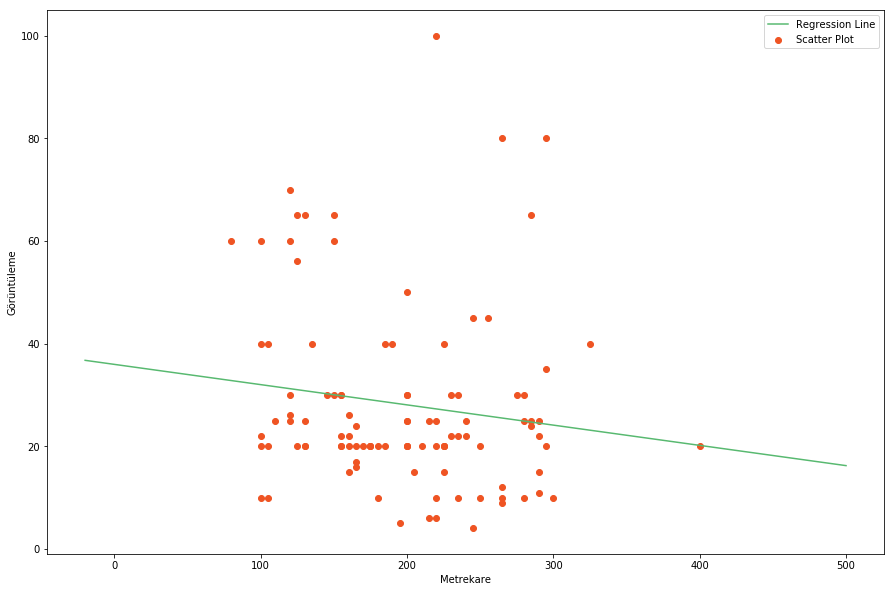

In [84]:
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Metrekare')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-0.47336377] 

 [29.77534247]


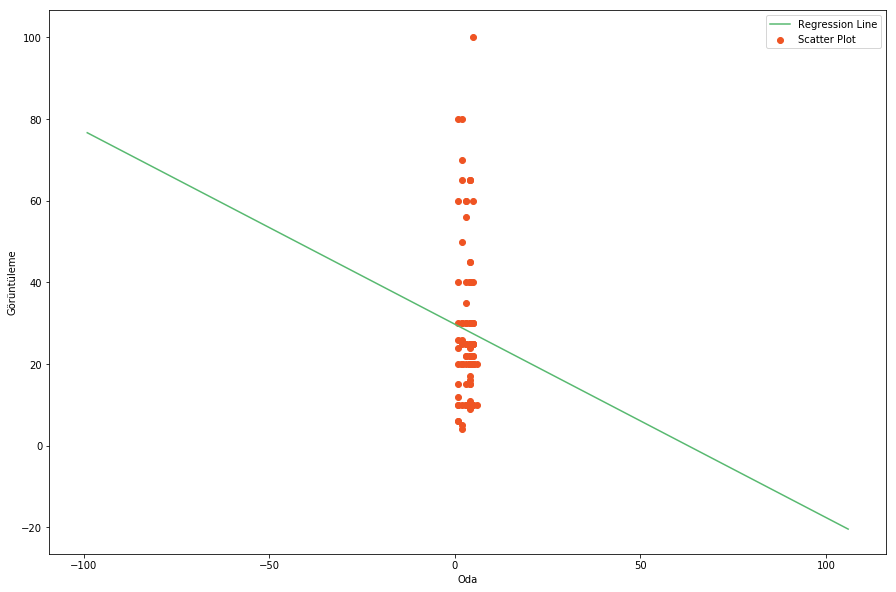

In [124]:
#metrekare için
array = data.values
X = array[:,1:2]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Oda')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-0.01078596] 

 [28.2745191]


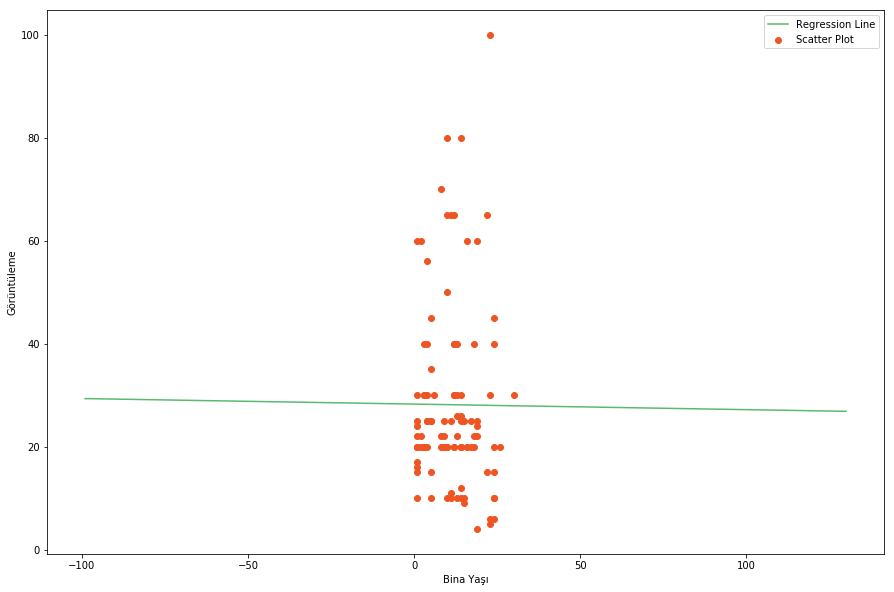

In [125]:
#metrekare için
array = data.values
X = array[:,2:3]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Bina Yaşı')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-0.57397004] 

 [32.17017121]


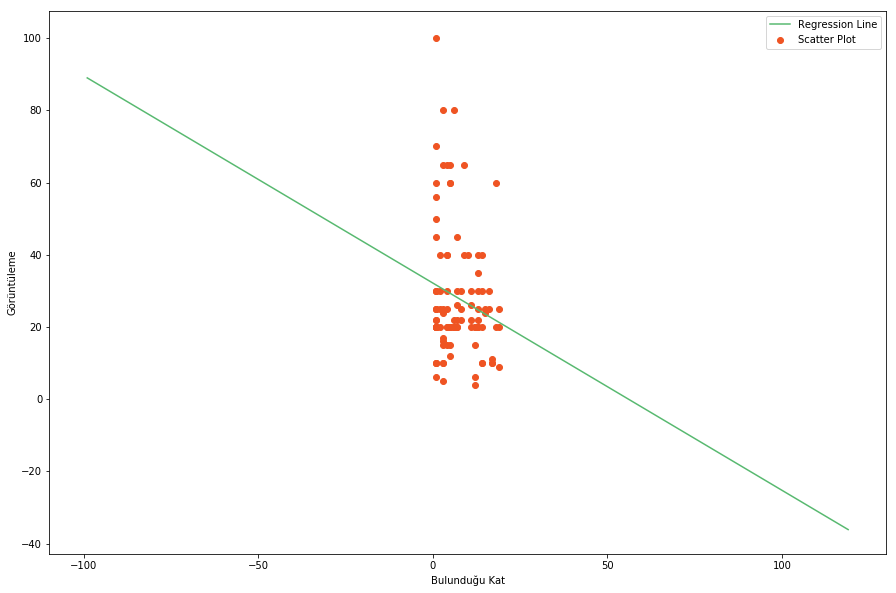

In [126]:
#metrekare için
array = data.values
X = array[:,3:4]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Bulunduğu Kat')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-0.39636364] 

 [28.36]


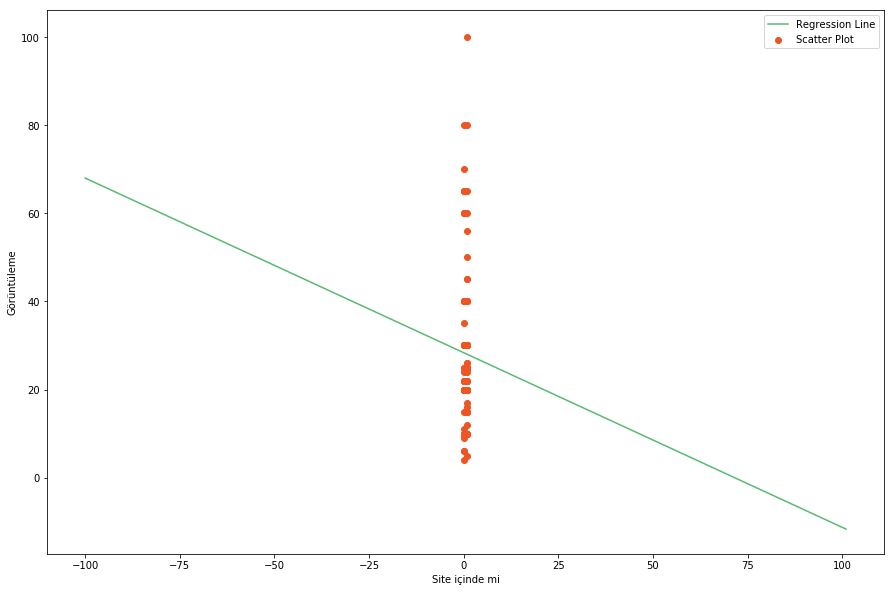

In [127]:
#metrekare için
array = data.values
X = array[:,4:5]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Site içinde mi')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-0.0136807] 

 [54.18479693]


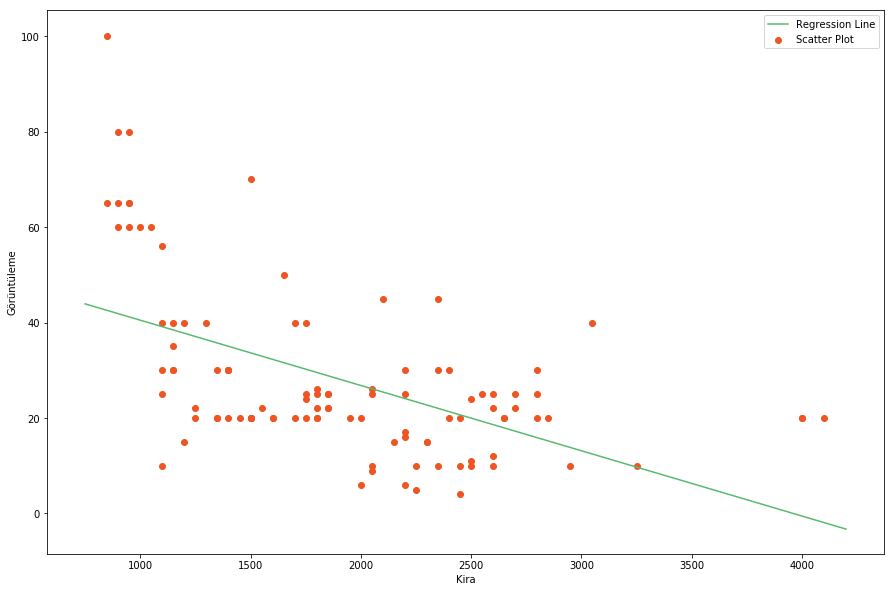

In [128]:
#metrekare için
array = data.values
X = array[:,5:6]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Kira')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-6.99226218] 

 [49.39553937]


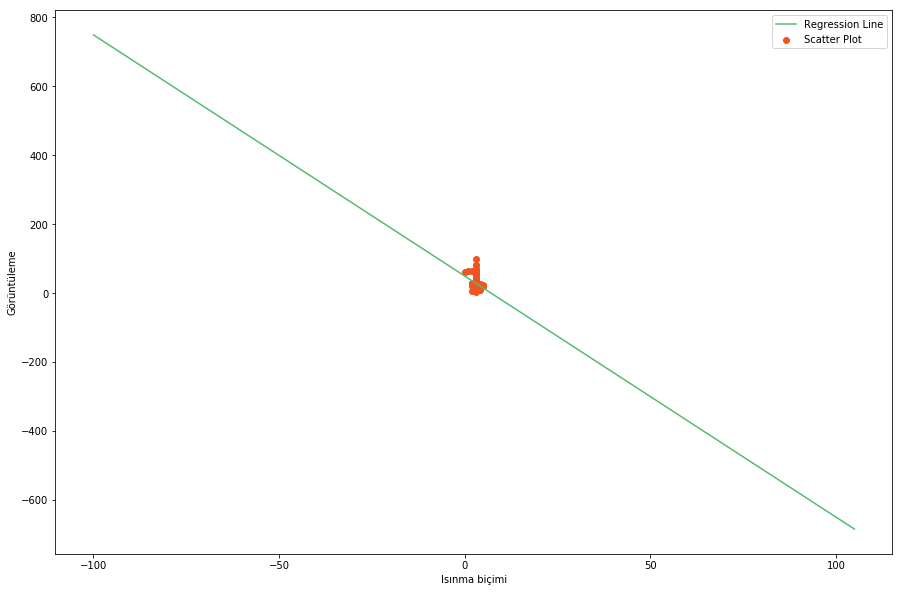

In [129]:
#metrekare için
array = data.values
X = array[:,6:7]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Isınma biçimi')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-1.57478035] 

 [31.42192492]


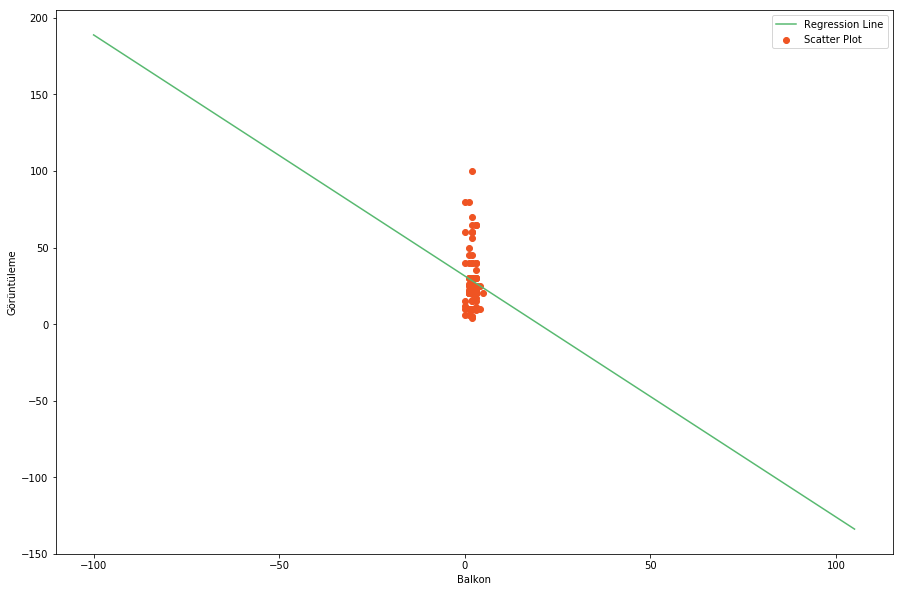

In [130]:
#metrekare için
array = data.values
X = array[:,7:8]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Balkon')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-4.73246493] 

 [34.64261857]


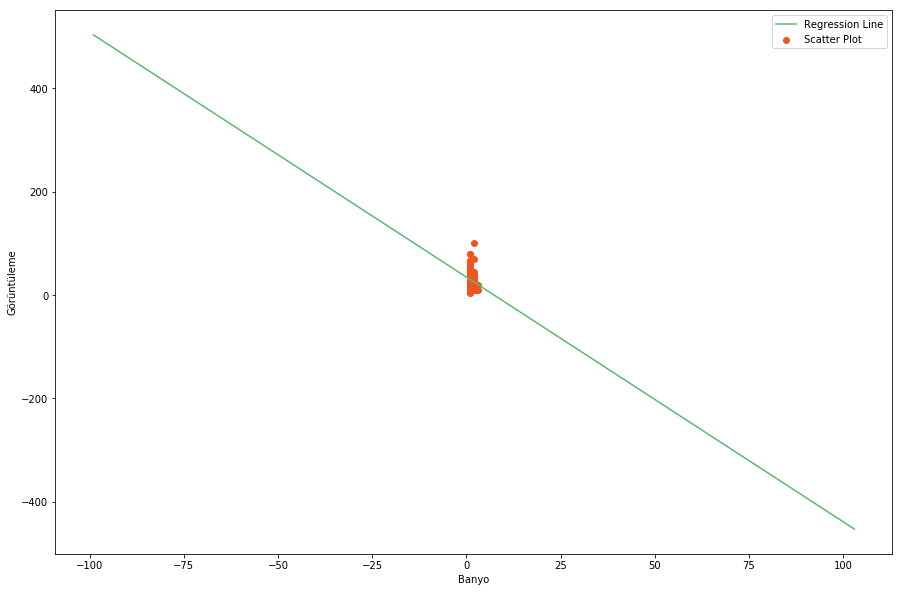

In [131]:
#metrekare için
array = data.values
X = array[:,8:9]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Banyo')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-3.23513815] 

 [29.32319286]


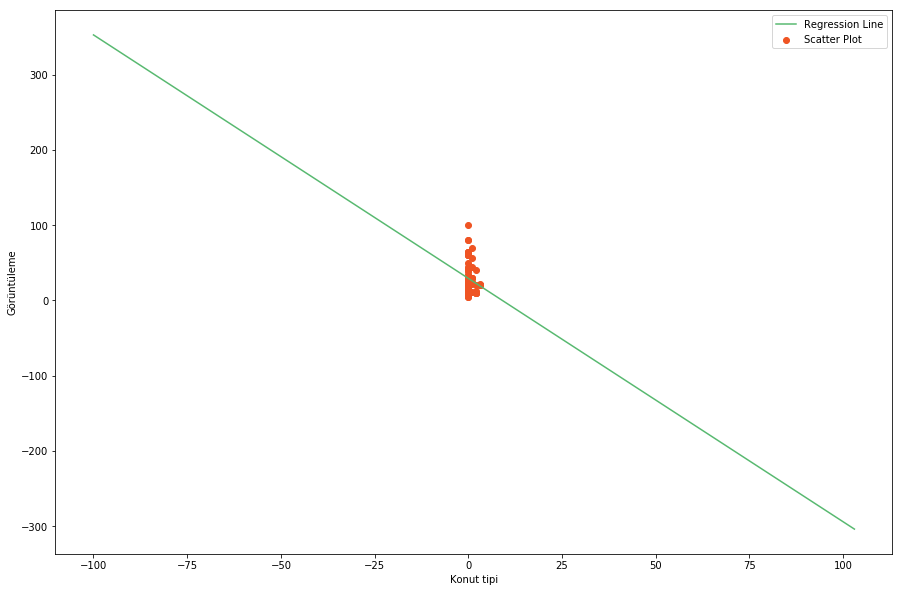

In [132]:
#metrekare için
array = data.values
X = array[:,9:10]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Konut tipi')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-9.97376543] 

 [30.43209877]


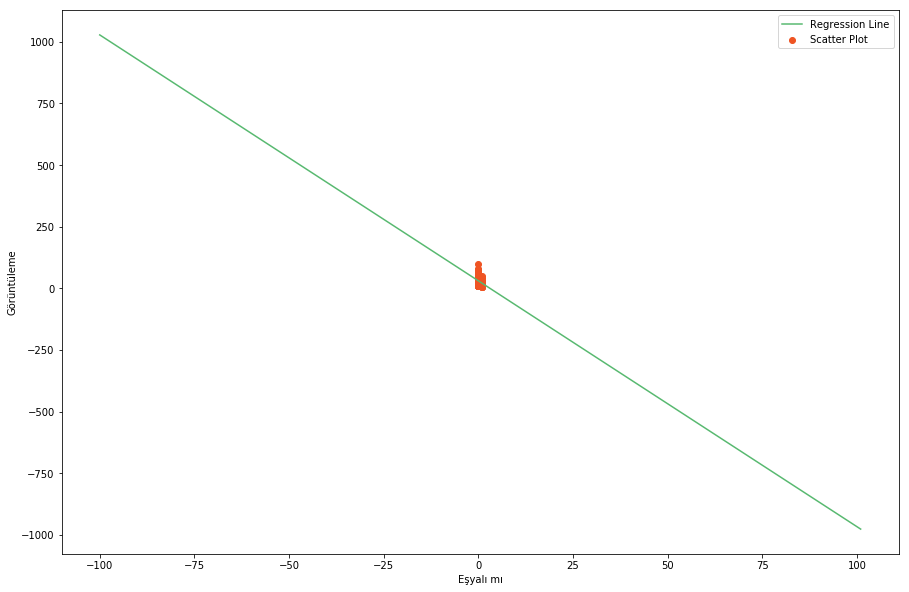

In [133]:
#metrekare için
array = data.values
X = array[:,10:11]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Eşyalı mı')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

[-4.91971999] 

 [44.59830206]


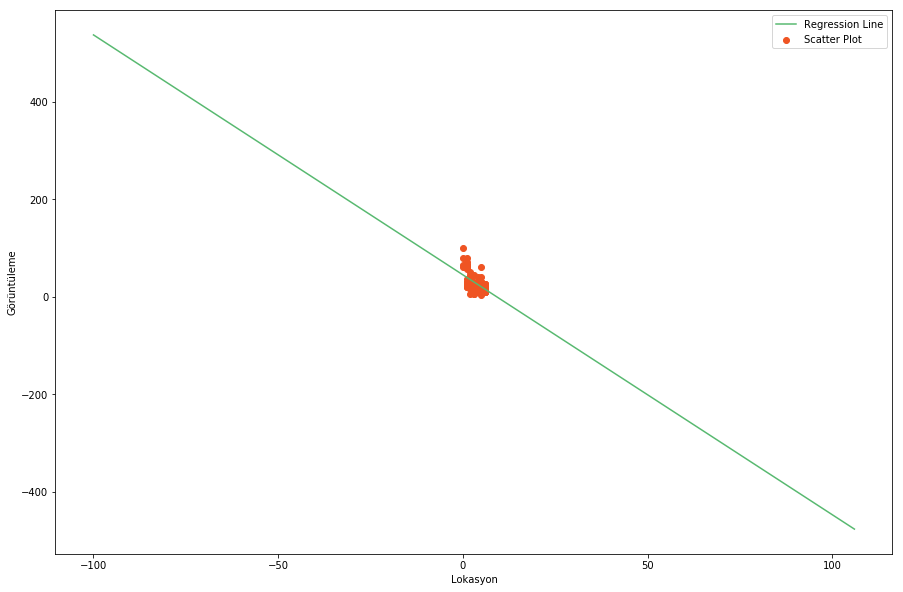

In [134]:
#metrekare için
array = data.values
X = array[:,11:12]
Y = array[:,12:13]
#mean
mean_x = np.mean(X)
mean_y = np.mean(Y)
#boyut
n = len(X)
#pay paydayı ayrı ayrı hesaplamak için
pay = 0
payda= 0
for i in range(n):
    pay += (X[i] - mean_x) * (Y[i] - mean_y)
    payda += (X[i] - mean_x) ** 2
    
#Parametreler 
beta1 = pay / payda
beta0 = mean_y - (beta1 * mean_x)
print(beta1, "\n\n", beta0)

# Calculating line values x and y
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
x
y = beta0 + beta1 * x

plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Lokasyon')
plt.ylabel('Görüntüleme')
plt.legend()
plt.show()

In [122]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = beta0 + beta1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

RMSE
[17.75653317]


In [118]:
tahmin

array([[20.92092217],
       [41.03184783],
       [33.09037289],
       [16.66438646],
       [31.90140059],
       [29.3673973 ],
       [31.82020325],
       [12.75046328],
       [14.54410829],
       [30.6728571 ],
       [26.07109307],
       [23.81403749],
       [33.55480376],
       [39.49093009],
       [42.88874868],
       [12.03389079],
       [52.45473292],
       [37.23694734],
       [39.2886704 ],
       [20.48690707],
       [28.3278486 ]])

In [119]:
tahmin2

array([22, 40, 10,  4, 40, 20,  5, 10, 30, 20,  6, 25, 20, 40, 25,  6, 25,
       30, 20,  4, 25])

In [120]:
y_test

array([[25],
       [10],
       [45],
       [10],
       [20],
       [20],
       [17],
       [20],
       [20],
       [20],
       [20],
       [20],
       [22],
       [40],
       [60],
       [25],
       [30],
       [20],
       [20],
       [10],
       [25]])

In [112]:
#Feature selection
data2=pd.read_csv("/home/ebru/18110131003/data2.csv")
data2

,metrekare,kira,banyo,tip,see
0,295,2650,1,3,20
1,125,950,1,0,65
2,255,2350,2,0,45
3,155,1150,1,0,30
4,290,2550,2,0,25
5,220,1850,2,0,25
6,250,2250,2,0,10
7,150,1050,1,0,60
8,280,2450,2,2,10
9,215,1750,1,1,25


In [113]:
data2.describe()

,metrekare,kira,banyo,tip,see
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,197.857143,1902.857143,1.371429,0.361905,28.152381
std,63.763600,706.012250,0.523618,0.810078,18.018036
min,80.000000,850.000000,1.000000,0.000000,4.000000
25%,150.000000,1350.000000,1.000000,0.000000,20.000000
50%,200.000000,1800.000000,1.000000,0.000000,22.000000
75%,240.000000,2400.000000,2.000000,0.000000,30.000000
max,400.000000,4100.000000,3.000000,3.000000,100.000000


In [114]:
#bağımsız değişken
x2=data2[['metrekare','kira','banyo','tip']]
#bağımlı değişken
y2=data2['see']

In [115]:
#train-test split
array = data2.values
x2 = array[:,0:4]
y2= array[:,4:5] 
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=0)

In [116]:
reg2=LinearRegression()


In [117]:
reg2.fit(x2_train,y2_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
reg2.score(x2_train,y2_train)

0.39568107682748366

In [119]:
tahmin2=reg2.predict(x2_test) 
print(tahmin2)

[[26.8959231 ]
 [42.38096327]
 [20.24698323]
 [13.27254864]
 [33.80945579]
 [31.86677722]
 [23.5510577 ]
 [ 8.27784216]
 [19.23088772]
 [27.85111671]
 [24.77846944]
 [27.69277178]
 [32.99249613]
 [41.27960511]
 [43.29961574]
 [22.80718032]
 [48.39762841]
 [35.95552   ]
 [39.2474141 ]
 [30.38210668]
 [27.75367368]]


In [146]:
#r2 değeri
print("Lineer R2 değeri:")
print(r2_score(y2_test,tahmin2))

Lineer R2 değeri:
-0.7352025975782988


In [99]:
#Feature selection
data3=pd.read_csv("/home/ebru/18110131003/data3.csv")
data3

,oda,bulundugukat,kira,isi,balkon,esya,lokasyon,see
0,2,1,2650,5,1,0,6,20
1,2,5,950,1,2,0,0,65
2,4,7,2350,3,1,0,3,45
3,3,13,1150,2,2,0,1,30
4,5,15,2550,3,3,0,6,25
5,2,16,1850,3,1,1,3,25
6,2,14,2250,3,1,0,4,10
7,1,1,1050,3,0,0,5,60
8,3,3,2450,3,2,1,6,10
9,5,1,1750,4,3,0,3,25


In [101]:
#bağımsız değişken
x3=data3[['oda', 'bulundugukat','kira','isi','balkon','esya','lokasyon']]
#bağımlı değişken
y3=data2['see']

In [102]:
#train-test split
array = data3.values
x3 = array[:,0:7]
y3= array[:,7:8] 
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.20, random_state=0)

In [107]:
reg3=LinearRegression()

In [108]:
reg3.fit(x3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [147]:
reg3.score(x3_train,y3_train)

0.4341003385205525

In [110]:
tahmin3=reg3.predict(x3_test) 
print(tahmin3)

[[26.52926317]
 [42.86288899]
 [30.25083001]
 [21.11701568]
 [32.53663533]
 [35.64128839]
 [31.17856579]
 [ 4.40070926]
 [15.24009456]
 [33.51929593]
 [33.76569349]
 [25.78126277]
 [39.06196877]
 [41.72397887]
 [41.11818105]
 [19.12633192]
 [47.84338192]
 [39.82006609]
 [39.34844725]
 [14.07099176]
 [30.88668345]]


In [148]:
#r2 değeri
print("Lineer R2 değeri:")
print(r2_score(y3_test,tahmin3))

Lineer R2 değeri:
-0.6051802898869849
